## CRISP-DM Phase 3. Data Preparation

The data preparation phase covers all activities needed to construct the final dataset [data that will be fed into the modeling tool(s)] from the initial raw data. Tasks include table, record, and attribute selection, as well as transformation and cleaning of data for modeling tools

In [24]:
import sys
sys.path.append('../src')
import utils
import data_processor
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import warnings 
warnings.filterwarnings('ignore')

# Load data
df: pd.DataFrame = utils.load_original_data()

# Data preprocessing object
processor = data_processor.DataProcessor(df)

### Converting Target Variable into binary values to conform with a Classification problem

In [13]:
# Convert Financial Distress column into 0 or 1
df['Financial Distress'] = [0 if x > -0.50 else 1 for x in df['Financial Distress']]

df.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,0,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,0,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,1,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,0,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [14]:
# Create feature matrix and target vector 
X, y = processor.create_feature_matrix_and_target_vector("Financial Distress")

### Balancing Data

Two different techniques were combined to address class imbalance:
- SMOTE: Oversample the minority class  
- Random Undersampling: Undersample the majority class 

Counter({0: 3536, 1: 136})


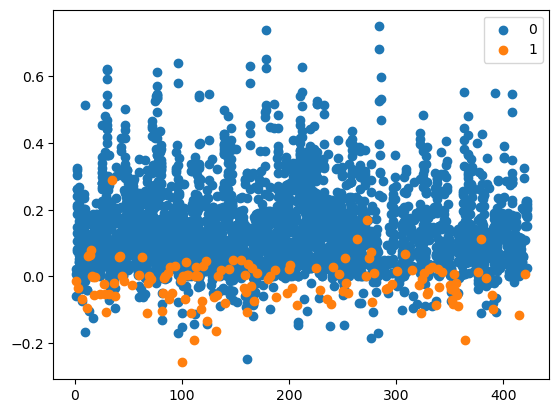

In [10]:
# Check class distribution
processor.class_distribution(X,y)

Counter({0: 2120, 1: 1060})


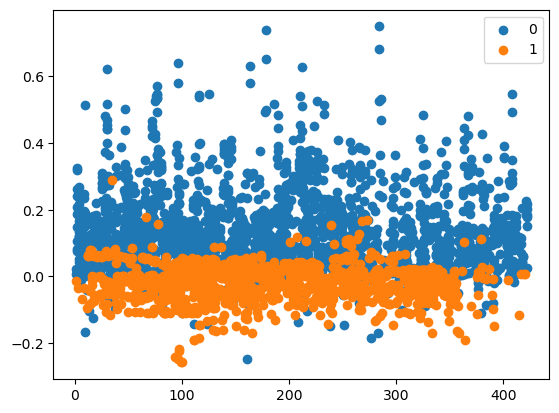

In [11]:
# Transform data with SMOTE for minority class and RandomUnderSampler for majority class to tackle class imbalance
X, y = processor.transform(X, y,0.3,0.5)

 The final class distribution after this sequence of transforms matches expectations with a 1:2 ratio or about 2,000 examples in the majority class and about 1,000 examples in the minority class.

### Scaling

In [17]:
X_scaled : pd.DataFrame = processor.scale()
X_scaled

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,-1.547615,-1.606591,-0.073530,-0.889790,1.454750,0.608946,-0.752754,0.387378,-0.250547,-0.009118,...,-0.083982,-1.003137,-0.979380,-0.873022,0.283316,0.349666,0.304413,-0.390080,1.783244,1.163525
1,-1.547615,-1.360496,-0.081102,-1.027125,1.151905,0.239109,-1.353457,0.353036,-0.155933,-0.009121,...,1.212300,-0.937551,-0.915781,-0.382796,0.283316,0.374081,0.304413,-0.408740,1.888901,1.236450
2,-1.547615,-1.114400,-0.230545,-1.575751,1.723920,-0.242885,-1.076758,-0.293797,-0.339742,-0.009142,...,2.037255,-0.863921,-0.836842,-0.382796,-0.070258,0.300835,0.304413,-0.583737,1.994557,1.309375
3,-1.547615,-0.868304,-0.189106,-1.207824,1.366713,-0.102155,-0.631868,-0.074498,-0.105055,-0.009127,...,-1.917741,-0.806224,-0.788598,-0.300928,0.283316,1.008882,0.304413,-0.534764,2.100214,1.382300
4,-1.539069,-1.606591,-0.224075,-0.189054,1.117781,-0.056358,0.360413,-0.279855,-0.040670,-0.009093,...,-0.083982,-1.003137,-0.979380,-0.873022,0.283316,0.349666,1.236806,0.056448,-0.646859,-0.440828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2.050408,0.608269,0.600718,0.609885,-2.560149,-1.193060,0.168319,0.435496,1.392953,-0.008869,...,0.787849,0.124977,0.169164,-0.321518,-0.247045,-0.529289,2.302398,-0.249068,-0.963829,0.580124
3668,2.050408,0.854364,0.394899,0.722805,-2.332018,-1.139656,0.389479,0.394978,1.116795,-0.008890,...,0.278987,0.596765,0.672734,1.087883,-0.247045,-1.627982,2.302398,-0.248453,-0.858173,0.653049
3669,2.050408,1.100460,0.221707,0.652220,-1.992406,-1.143906,0.310047,0.366573,0.876438,-0.008897,...,0.015576,1.299033,1.383016,1.087883,-0.247045,-2.140706,2.302398,-0.231805,-0.752516,0.725974
3670,2.050408,1.346556,0.117834,0.464548,-1.734255,-1.180487,0.137651,0.303826,0.730425,-0.008900,...,0.362799,1.721322,1.793332,2.068336,2.404759,1.106544,2.302398,-0.224919,-0.646859,0.798899


### Lag Values

In [37]:
# Helper function to create lagged features
def lagged_features(df_long, lag_features, window=2, lag_prefix='lag', lag_prefix_sep='_'):
    """
    Function calculates lagged features (only for columns mentioned in lag_features)
    based on time_feature column. The highest value of time_feature is retained as a row
    and the lower values of time_feature are added as lagged_features
    :param df_long: Data frame (longitudinal) to create lagged features on
    :param lag_features: A list of columns to be lagged
    :param window: How many lags to perform (0 means no lagged feature will be produced)
    :param lag_prefix: Prefix to name lagged columns.
    :param lag_prefix_sep: Separator to use while naming lagged columns
    :return: Data Frame with lagged features appended as columns
    """
    if not isinstance(lag_features, list):
        # So that while sub-setting DataFrame, we don't get a Series
        lag_features = [lag_features]

    if window <= 0:
        return df_long

    df_working = df_long[lag_features].copy()
    df_result = df_long.copy()
    for i in range(1, window+1):
        df_temp = df_working.shift(i)
        df_temp.columns = [lag_prefix + lag_prefix_sep + str(i) + lag_prefix_sep + x
                           for x in df_temp.columns]
        df_result = pd.concat([df_result.reset_index(drop=True),
                               df_temp.reset_index(drop=True)],
                               axis=1)

    return df_result


# Now split Data Set into groups (based on Company) and create lagged features for each group
grouped_company = df.groupby('Company')
cols_to_lag = [col for col in df.columns if col.startswith('x')]
df_cross = pd.DataFrame()

for name, group in grouped_company:
    # For each group, calculate lagged features and rbind to df_cross
    print('----------------------------------------------------')
    print('Working on group:', name, 'with shape', group.shape)
    print(group.head())
    df_cross = pd.concat([df.reset_index(drop=True),
                          lagged_features(group, cols_to_lag).reset_index(drop=True)],
                         axis=0)
    print('Shape of df_', df.shape)
    
# Remove rows with NAs
df = df.dropna()
df.head()

----------------------------------------------------
Working on group: 1 with shape (4, 86)
   Company  Time Financial Distress      x1        x2       x3       x4  \
0        1     1                  0  1.2810  0.022934  0.87454  1.21640   
1        1     2                  0  1.2700  0.006454  0.82067  1.00490   
2        1     3                  0  1.0529 -0.059379  0.92242  0.72926   
3        1     4                  1  1.1131 -0.015229  0.85888  0.80974   

         x5        x6       x7  ...      x74    x75     x76     x77   x78  \
0  0.060940  0.188270  0.52510  ...   85.437  27.07  26.102  16.000  16.0   
1 -0.014080  0.181040  0.62288  ...  107.090  31.31  30.194  17.000  16.0   
2  0.020476  0.044865  0.43292  ...  120.870  36.07  35.273  17.000  15.0   
3  0.076037  0.091033  0.67546  ...   54.806  39.80  38.377  17.167  16.0   

   x79  x80       x81  x82  x83  
0  0.2   22  0.060390   30   49  
1  0.4   22  0.010636   31   50  
2 -0.2   22 -0.455970   32   51  
3  5.6   2

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,0,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,0,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,1,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,0,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


### Spliting Data

This dataset prevents us from using sklearn.model_selection.TimeSeriesSplit, as the assumption of this function is that each row represents a data point from a unique instance of time (and the rows are arranged as per increasing value of time).

In [27]:
# Create Time-Series sampling function to draw train-test splits
def ts_sample(df_input, train_rows, test_rows):
    """
    Function to draw specified train_rows and test_rows in time-series rolling sampling format
    :param df_input: Input DataFrame
    :param train_rows: Number of rows to use as training set
    :param test_rows: Number of rows to use as test set
    :return: List of tuples. Each tuple contains 2 lists of indexes corresponding to train and test index
    """
    if df_input.shape[0] <= train_rows:
        return [(df_input.index, pd.Index([]))]

    i = 0
    train_lower, train_upper = 0, train_rows + test_rows*i
    test_lower, test_upper = train_upper, min(train_upper + test_rows, df_input.shape[0])

    result_list = []
    while train_upper < df_input.shape[0]:
        # Get indexes into result_list
        # result_list += [([df_input.index[train_lower], df_input.index[train_upper]],
        #                  [df_input.index[test_lower], df_input.index[test_upper]])]
        result_list += [(df_input.index[train_lower:train_upper],
                         df_input.index[test_lower:test_upper])]

        # Update counter and calculate new indexes
        i += 1
        train_upper = train_rows + test_rows*i
        test_lower, test_upper = train_upper, min(train_upper + test_rows, df_input.shape[0])

    return result_list

    

In [28]:
# For each group, apply function ts_sample
# Depending on size of group, the output size of ts_sample (which is a list of (train_index, test_index))
# tuples will vary. However, we want the size of each of these lists to be equal.
# To do that, we will augment the smaller lists by appending the last seen train_index and test_index
# For example:
# group 1 => [(Int64Index([1, 2, 3], dtype='int64'), (Int64Index[4, 5], dtype='int64)),
#             (Int64Index([1, 2, 3, 4, 5], dtype='int64'), (Int64Index([6], dtype='int64'))]
# group 2 => [(Int64Index([10, 11, 12], dtype='int64'), (Int64Index[13, 14], dtype='int64')),
#             (Int64Index([10, 11, 12, 13, 14), Int64Index([15, 16])),
#             (Int64Index([10, 11, 12, 13, 14, 15, 16]), Int64Index([17, 18]))]
# Above, group 2 has 3 folds whereas group 1 has 2. We will augment group 2 to also have 3 folds:
# group 1 => [(Int64Index([1, 2, 3], dtype='int64'), (Int64Index[4, 5], dtype='int64)),
#             (Int64Index([1, 2, 3, 4, 5], dtype='int64'), (Int64Index([6], dtype='int64')),
#             (Int64Index([1, 2, 3, 4, 5, 6]), Int64Index([]))]
grouped_company_cross = df_cross.groupby('Company')
acc = []
max_size = 0
for name, group in grouped_company_cross:
    # For each group, calculate ts_sample and also store largest ts_sample output size
    group_res = ts_sample(group, 4, 4)
    acc += [group_res]
    # print('Working on name:' + str(name))
    # print(acc)

    if len(group_res) > max_size:
        # Update the max_size that we have observed so far
        max_size = len(group_res)

        # All existing lists (apart from the one added latest)in acc need to be augmented
        # to match the new max_size by appending the last value in those list (combining train and test)
        for idx, list_i in enumerate(acc):
            if len(list_i) < max_size:
                last_train, last_test = list_i[-1][0], list_i[-1][1]
                list_i[len(list_i):max_size] = [(last_train.union(last_test),
                                                 pd.Index([]))] * (max_size - len(list_i))

                acc[idx] = list_i

    elif len(group_res) < max_size:
        # Only the last appended list (group_res) needs to be augmented
        last_train, last_test = acc[-1][-1][0], acc[-1][-1][1]
        acc[-1] = acc[-1] + [(last_train.union(last_test), pd.Index([]))] * (max_size - len(acc[-1]))


print(acc[0:2])

[[(Index([0, 1, 2, 3], dtype='int64'), Index([], dtype='object')), (Index([0, 1, 2, 3], dtype='object'), Index([], dtype='object')), (Index([0, 1, 2, 3], dtype='object'), Index([], dtype='object'))], [(Index([4, 5, 6, 7], dtype='int64'), Index([8, 9, 10, 11], dtype='int64')), (Index([4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'), Index([12, 13, 14, 15], dtype='int64')), (Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64'), Index([16, 17], dtype='int64'))]]


In [29]:
# acc now contains a list of lists, where each internal list contains tuples of train_index, test_index
# [[(group_1_train_index1, group_1_test_index1), (group_1_train_index2, group_1_test_index2)],
#  [(group_2_train_index1, group_2_test_index1), (group_2_train_index2, group_2_test_index2)],
#  [(group_3_train_index1, group_3_test_index1), (group_3_train_index2, group_3_test_index2)]]
#
# Our goal is to drill-down by removing group-divisions:
# [(train_index1, test_index1), (train_index2, test_index2)]
flat_acc = []
for idx, list_i in enumerate(acc):
    if len(flat_acc) == 0:
        flat_acc += list_i
        continue

    for inner_idx, tuple_i in enumerate(list_i):
        flat_acc[inner_idx] = (flat_acc[inner_idx][0].union(tuple_i[0]),
                               flat_acc[inner_idx][1].union(tuple_i[1]))


print(flat_acc[0:2])

[(Index([   0,    1,    2,    3,    4,    5,    6,    7,   18,   19,
       ...
       3656, 3657, 3658, 3659, 3660, 3661, 3664, 3665, 3666, 3667],
      dtype='int64', length=1498), Index([   8,    9,   10,   11,   23,   24,   25,   26,   37,   38,
       ...
       3641, 3642, 3643, 3644, 3662, 3663, 3668, 3669, 3670, 3671],
      dtype='object', length=1060)), (Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671],
      dtype='object', length=2558), Index([   0,    1,    2,    3,   12,   13,   14,   15,   27,   28,
       ...
       3592, 3603, 3604, 3605, 3606, 3616, 3617, 3618, 3619, 3645],
      dtype='object', length=821))]


In [33]:
#flat_acc is now a list of tuples of train_index, test_index

[(Index([   0,    1,    2,    3,    4,    5,    6,    7,   18,   19,
         ...
         3656, 3657, 3658, 3659, 3660, 3661, 3664, 3665, 3666, 3667],
        dtype='int64', length=1498),
  Index([   8,    9,   10,   11,   23,   24,   25,   26,   37,   38,
         ...
         3641, 3642, 3643, 3644, 3662, 3663, 3668, 3669, 3670, 3671],
        dtype='object', length=1060)),
 (Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         ...
         3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671],
        dtype='object', length=2558),
  Index([   0,    1,    2,    3,   12,   13,   14,   15,   27,   28,
         ...
         3592, 3603, 3604, 3605, 3606, 3616, 3617, 3618, 3619, 3645],
        dtype='object', length=821)),
 (Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         ...
         3662, 3663, 3664, 3665, 3666, 3667, 3668, 3669, 3670, 3671],
        dtype='object', length=3375),
  Index([   4,    5,    6,    7,   16,   17,   31,

In [23]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import numpy as np
# confusion matrix
from sklearn.metrics import confusion_matrix


In [24]:
# For each entry in flat_acc, perform train and test and plot metrics
dependent_cols = [col for col in df_model.columns if col != 'Financial Distress']
independent_col = ['Financial Distress']
for idx, tuple_i in enumerate(flat_acc):
    print('---------------------------------------')
    X_train, X_test = df_model.loc[tuple_i[0]][dependent_cols], df_model.loc[tuple_i[1]][dependent_cols]
    y_train, y_test = df_model.loc[tuple_i[0]][independent_col], df_model.loc[tuple_i[1]][independent_col]
    
    # Fit logistic regression model to train data and test on test data
    lr_mod = LogisticRegression(C=0.01, penalty='l2')  # These should be determined by nested cv
    lr_mod.fit(X_train, y_train)
    
    y_pred_proba = lr_mod.predict_proba(X_test)
    y_pred = lr_mod.predict(X_test)
    
    # Print Confusion Matrix and ROC AUC score
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    
    print('ROC AUC score:')
    print(roc_auc_score(y_test['Financial Distress'].astype(int), y_pred_proba[:, 1]))

---------------------------------------
Confusion Matrix:
[[1006   10]
 [  37    7]]
ROC AUC score:
0.8255637079455977
---------------------------------------
Confusion Matrix:
[[792   3]
 [ 26   0]]
ROC AUC score:
0.8104499274310595
---------------------------------------
Confusion Matrix:
[[287   0]
 [ 13   1]]
ROC AUC score:
0.8432055749128919


### Feature Extraction and Selection

In [ ]:
# Creating target vector and feature matrix
Y = data.iloc[:,2].values
for y in range(0,len(Y)): # Coverting target variable from continuous to binary form
       if Y[y] > -0.5:
              Y[y] = 0
       else:
              Y[y] = 1
X = data.iloc[:,3:].values

Python's scikit-learn module has a TimeSeriesSplit function that can help run Forward Chaining. However, the function makes an assumption that the entire DataFrame is to be treated as one entity. Whereas,  Financial Distress Prediction Data Set is composed of groups of data (row-wise) each of which group should be treated to Forward Chaining separately.

rfe

#### Save Data

In [22]:
# Append X and Y to create a single data frame
df_model = pd.DataFrame(X)
df_model['Financial Distress'] = y

In [26]:
# save data
with open('../data/processed/financial_data_processed.pkl', 'wb') as f:
    pkl.dump(df_model, f)